## Imports

In [1]:
from ipynb.fs.full.Jacobian import *
from ipynb.fs.full.SubFunctions import *
from ipynb.fs.full.GlobalVars import *

## Solver for one differencial equation

In [2]:
def Solver_one_equation(expr, u0, use_trapezoidal, symbol):
    t0 = 0
    un_1 = u0
    un = u0
    un_save = un
    
    velocity_n = 0
    #Need to keep in memory the previous derivative value.
    if(use_trapezoidal):
        velocity_n = expr.subs(symbol, u0)
    

    function = [u0]
    time = [t0]

    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        f_un_plus1 = 1
       
        #Newton's method
        while(nb < Nnewton):
            nb += 1
            print("velociy_n = ", end='')
            print(velocity_n)
            f = create_f(symbol, un_1, expr, use_trapezoidal, velocity_n)
            f_un = f.subs(symbol, un)
            f_un_prime = Jacobian_one(f).subs(symbol, un)
            
            un_plus1 = float(un - (f_un / f_un_prime))
            f_un_plus1 = float(f.subs(symbol, un_plus1))
            
            
            print("t0 = ", end='')
            print(t0)
            print("un = ", end='')
            print(un)
            print("f = ", end='')
            print(f)
            print("fun = ", end='')
            print(f_un)
            print("f un prime = ", end='')
            print(f_un_prime)
            print("un+1 = ", end='')
            print(un_plus1)
            print("fun+1 = ", end='')
            print(f_un_plus1)
            
            un = un_plus1
            if(f_un_plus1 < Epsilon):
                break
            
            
        #Need to keep in memory the residual of the previous iteration.
        if(use_trapezoidal):
            velocity_n = (2/delta) * (un_plus1 - un_save) - velocity_n
        
        un_1 = un
        un_save = un
        print("------")
        time.append(t0)
        function.append(un_plus1)
        
    return result_solver(time, function)

## Test one equation
$S=\begin{equation}
\left\{ 
  \begin{aligned}
    \frac{du}{dt}=-u\\
  \end{aligned}
  \right.
\end{equation}
$

$S=\begin{equation}
\left\{ 
  \begin{aligned}
    u(t)=e^{-u}\\
  \end{aligned}
  \right.
\end{equation}
$

velociy_n = -1
t0 = 0.1
un = 1
f = 21.0*u - 19.0
fun = 2.00000000000000
f un prime = 21.0000000000000
un+1 = 0.9047619047619048
fun+1 = 0.0
------
velociy_n = -0.904761904761905
t0 = 0.2
un = 0.9047619047619048
f = 21.0*u - 17.1904761904762
fun = 1.80952380952381
f un prime = 21.0000000000000
un+1 = 0.81859410430839
fun+1 = 0.0
------
velociy_n = -0.818594104308391
t0 = 0.30000000000000004
un = 0.81859410430839
f = 21.0*u - 15.5532879818594
fun = 1.63718820861678
f un prime = 21.0000000000000
un+1 = 0.7406327610409242
fun+1 = 0.0
------
velociy_n = -0.740632761040923
t0 = 0.4
un = 0.7406327610409242
f = 21.0*u - 14.0720224597776
fun = 1.48126552208185
f un prime = 21.0000000000000
un+1 = 0.6700963076084553
fun+1 = 0.0
------
velociy_n = -0.670096307608456
t0 = 0.5
un = 0.6700963076084553
f = 21.0*u - 12.7318298445607
fun = 1.34019261521691
f un prime = 21.0000000000000
un+1 = 0.6062776116457452
fun+1 = 0.0
------
velociy_n = -0.606277611645746
t0 = 0.6
un = 0.6062776116457452
f = 21.0*

fun+1 = 0.0
------
velociy_n = -0.00607085160488642
t0 = 5.1999999999999975
un = 0.006070851604886419
f = 21.0*u - 0.115346180492842
fun = 0.0121417032097728
f un prime = 21.0000000000000
un+1 = 0.005492675261563903
fun+1 = 0.0
------
velociy_n = -0.00549267526156390
t0 = 5.299999999999997
un = 0.005492675261563903
f = 21.0*u - 0.104360829969714
fun = 0.0109853505231278
f un prime = 21.0000000000000
un+1 = 0.004969563331891151
fun+1 = -1.3877787807814457e-17
------
velociy_n = -0.00496956333189115
t0 = 5.399999999999997
un = 0.004969563331891151
f = 21.0*u - 0.0944217033059319
fun = 0.00993912666378230
f un prime = 21.0000000000000
un+1 = 0.004496271585996755
fun+1 = 0.0
------
velociy_n = -0.00449627158599676
t0 = 5.4999999999999964
un = 0.004496271585996755
f = 21.0*u - 0.0854291601339383
fun = 0.00899254317199352
f un prime = 21.0000000000000
un+1 = 0.004068055244473254
fun+1 = 0.0
------
velociy_n = -0.00406805524447326
t0 = 5.599999999999996
un = 0.004068055244473254
f = 21.0*u - 

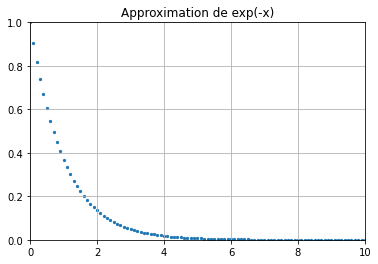

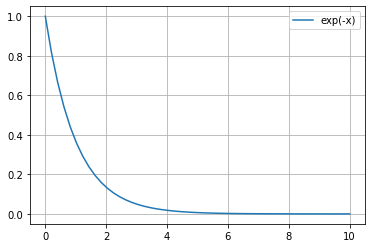

In [3]:
t = sp.Symbol('t', real=True)
u0 = 1
use_trapezoidal = True
du = -u
symbol = u
res = Solver_one_equation(du, u0, use_trapezoidal, symbol)


absi = []
for i in range(0, len(res)):
    absi.append(res[i][0])
coords = []
for j in range(0, len(res)):
    coords.append(res[j][1])
    
plt.ylim([0, 1])
plt.title('Approximation de exp(-x)')
plt.xlim([0, 10])
plt.scatter(absi, coords, s=5)
plt.grid(True)

fig, ax = plt.subplots()
x = np.linspace(0, 10, 50)
y = np.exp(-x)
ax.plot(x, y, label ='exp(-x)')
ax.grid(True)
plt.legend()  
plt.show()

## Solver for 2 differentials equations

In [4]:
def Solver_two_equations(u0, v0, f1, f2, use_trapezoidal):
    t0 = 0
    
    xk_1 = np.array([u0, v0])
    xk = xk_1
    xk_save = xk
    
    velocity_n = [0, 0]
    #Need to keep in memory the previous derivative value.
    if(use_trapezoidal):
        velocity_n = [f1.subs(v, v0), f2.subs(u, u0)]
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Functions = [u0, u1, u2, ...., un]
    fu = [u0]
    fv = [v0]
    time = [t0]
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        f_xk_plus1 = 1
        #Newton's method
        while(nb < Nnewton):
            nb+=1
            
            #Need to keep in memory the previous derivative value.
            print("velocity_n : ", end='')
            print(velocity_n)
            vec_f = create_2_f(xk_1, f1, f2, use_trapezoidal, velocity_n)
            F_xk = create_fxk_1(xk, vec_f)
            F_xk_prime = f_prime_2_eqs(xk, vec_f[0], vec_f[1])
            xk_plus1 = xk - np.dot(LA.inv(F_xk_prime), F_xk)
            
            
          
            #2 types of check the approximation.
            f_xk_plus1 =[0, 0]
            f_xk_plus1[0] = float(vec_f[0].evalf(subs={u: xk_plus1[0], v: xk_plus1[1]}))
            f_xk_plus1[1] = float(vec_f[1].evalf(subs={u: xk_plus1[0], v: xk_plus1[1]})) 
            
            norm_f_xk_plus1 = LA.norm(f_xk_plus1)
            #norm_xk = LA.norm(xk - xn_1_global)
            
            print("t0 = ", end='')
            print(t0)
            print("xk = ", end='')
            print(xk)
            print("vecf = ", end='')
            print(vec_f)
            print("fxk = ", end='')
            print(F_xk)
            print("fxk_prime = ", end='')
            print(F_xk_prime)
            print("xk_plus1 = ", end='')
            print(xk_plus1)
            print("norme fxk_plus1 = ", end='')
            print(norm_f_xk_plus1)
            
            xk = xk_plus1
            print("------------------------")
            
            if(norm_f_xk_plus1 < Epsilon):
                break
            
        #Need to keep in memory the residual of the previous iteration.
        if(use_trapezoidal):
            velocity_n[0] =  (2/delta) * (xk_plus1[0] - xk_save[0]) - velocity_n[0]
            velocity_n[1] = (2/delta) * (xk_plus1[1] - xk_save[1]) - velocity_n[1]
            
        xk_1 = xk
        xk_save = xk
        #Update our 3 lists and indexes.
        time.append(t0)
        fu.append(xk_plus1[0])
        fv.append(xk_plus1[1])
        
        print("_____________________________________________")
      
    return result_solver(time, fu, fv)

## Test 2 equations
$S=\begin{equation}
\left\{ 
  \begin{aligned}
    \frac{du}{dt}&=&v\\
    \frac{dv}{dt}&=&-u\\
  \end{aligned}
  \right.
\end{equation}
$

$S=\begin{equation}
\left\{ 
  \begin{aligned}
    u(t)&=&cos(t)+sin(t)\\
    v(t)&=&cos(t)-sin(t)\\
  \end{aligned}
  \right.
\end{equation}
$

velocity_n : [0, 1]
t0 = 0.1
xk = [1 0]
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk = [ 3.78182804e-124 -2.00000000e+000]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [1.00498753 0.09975062]
norme fxk_plus1 = 0.19975046777556718
------------------------
velocity_n : [0, 1]
t0 = 0.1
xk = [1.00498753 0.09975062]
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk = [ 0.19950125 -0.00997506]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.99506222 0.10074564]
norme fxk_plus1 = 0.019950124688279235
------------------------
velocity_n : [0, 1]
t0 = 0.1
xk = [0.99506222 0.10074564]
vecf = [20.0*u + v - 20.0 -u + 20.0*v - 1]
fxk = [0.00199004 0.01985062]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.99491346 0.09976055]
norme fxk_plus1 = 0.001992523369331404
------------------------
_____________________________________________
velocity_n : [-0.101730735443342, 0.995210976296797]
t0 = 0.2
xk = [0.99491346 0.09976055]
vecf = [20.0*u + v - 19.7965385291133 -u + 20.0*v - 2.99042195259359]
fxk

xk_plus1 = [0.45847719 0.89768259]
norme fxk_plus1 = 0.19943392018300454
------------------------
velocity_n : [-0.841185369234154, 0.538267991772343]
t0 = 1.0999999999999999
xk = [0.45847719 0.89768259]
vecf = [20.0*u + v - 9.95132219787574 -u + 20.0*v - 17.3328782730313]
fxk = [0.11590416 0.16229638]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.4522917  0.88987705]
norme fxk_plus1 = 0.019918509423435777
------------------------
velocity_n : [-0.841185369234154, 0.538267991772343]
t0 = 1.0999999999999999
xk = [0.4522917  0.88987705]
vecf = [20.0*u + v - 9.95132219787574 -u + 20.0*v - 17.3328782730313]
fxk = [-0.01561109  0.01237097]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.45303946 0.88922111]
norme fxk_plus1 = 0.001989365787362694
------------------------
_____________________________________________
velocity_n : [-0.890532983695149, 0.451543945392856]
t0 = 1.2
xk = [0.45303946 0.88922111]
vecf = [20.0*u + v - 8.17025623048544 -u + 20.0*v - 18.235966163817]
fxk = [ 1.7797

xk_plus1 = [-0.41717818  0.91568517]
norme fxk_plus1 = 0.1990883132796118
------------------------
velocity_n : [-0.942991900119619, -0.323477849656967]
t0 = 2.0000000000000004
xk = [-0.41717818  0.91568517]
vecf = [20.0*u + v + 7.37294881488583 -u + 20.0*v - 18.5395209443667]
fxk = [-0.05492954  0.19136066]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.41491576  0.90600402]
norme fxk_plus1 = 0.01988399185312602
------------------------
velocity_n : [-0.942991900119619, -0.323477849656967]
t0 = 2.0000000000000004
xk = [-0.41491576  0.90600402]
vecf = [20.0*u + v + 7.37294881488583 -u + 20.0*v - 18.5395209443667]
fxk = [-0.01936231 -0.00452484]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.41393877  0.90618141]
norme fxk_plus1 = 0.001985918336952954
------------------------
_____________________________________________
velocity_n : [-0.905826624794109, -0.415892742049407]
t0 = 2.1000000000000005
xk = [-0.41393877  0.90618141]
vecf = [20.0*u + v + 9.18460206447404 -u + 20.0*v - 1

fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.96586299  0.23805129]
norme fxk_plus1 = 0.01984953409967441
------------------------
velocity_n : [-0.332496556225033, -0.938017072857681]
t0 = 2.9000000000000012
xk = [-0.96586299  0.23805129]
vecf = [20.0*u + v + 19.0707263672199 -u + 20.0*v - 5.74483466758578]
fxk = [-0.00848219 -0.01794593]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.96539519  0.23892519]
norme fxk_plus1 = 0.001982476860767996
------------------------
_____________________________________________
velocity_n : [-0.237177380863342, -0.966330797042690]
t0 = 3.0000000000000013
xk = [-0.96539519  0.23892519]
vecf = [20.0*u + v + 19.5450811289466 -u + 20.0*v - 3.8121730735004]
fxk = [0.47610257 1.93172598]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.99395822  0.14376705]
norme fxk_plus1 = 0.19870500799621815
------------------------
velocity_n : [-0.237177380863342, -0.966330797042690]
t0 = 3.0000000000000013
xk = [-0.99395822  0.14376705]
vecf = [20.0*u + v +

vecf = [20.0*u + v + 12.2429353841451 -u + 20.0*v + 15.65169990522]
fxk = [-0.13700127 -0.14334324]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.57087362 -0.81184772]
norme fxk_plus1 = 0.01980368329771524
------------------------
velocity_n : [0.751778328503569, -0.648605422135845]
t0 = 4.100000000000001
xk = [-0.57087362 -0.81184772]
vecf = [20.0*u + v + 12.2429353841451 -u + 20.0*v + 15.65169990522]
fxk = [ 0.01361528 -0.01438089]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.57151682 -0.81109652]
norme fxk_plus1 = 0.0019778975011982194
------------------------
_____________________________________________
velocity_n : [0.812598925534101, -0.570230415445695]
t0 = 4.200000000000001
xk = [-0.57151682 -0.81109652]
vecf = [20.0*u + v + 10.6177375330769 -u + 20.0*v + 16.7921607361114]
fxk = [-1.62369544  1.14174724]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.49338176 -0.87209063]
norme fxk_plus1 = 0.1982460156629877
------------------------
velocity_n : [0.812598925534101,

fxk = [-1.90054046 -0.5606032 ]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [ 0.3755031  -0.92708599]
norme fxk_plus1 = 0.19790246732617206
------------------------
velocity_n : [0.950233717320450, 0.281288160123455]
t0 = 5.099999999999998
xk = [ 0.3755031  -0.92708599]
vecf = [20.0*u + v - 6.53653454165398 -u + 20.0*v + 18.724846770142]
fxk = [ 0.04644151 -0.19237612]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [ 0.37366656 -0.91737536]
norme fxk_plus1 = 0.019765555211170883
------------------------
velocity_n : [0.950233717320450, 0.281288160123455]
t0 = 5.099999999999998
xk = [ 0.37366656 -0.91737536]
vecf = [20.0*u + v - 6.53653454165398 -u + 20.0*v + 18.724846770142]
fxk = [0.01942127 0.00367309]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [ 0.37268876 -0.91751012]
norme fxk_plus1 = 0.0019740894496377993
------------------------
_____________________________________________
velocity_n : [0.917240591866064, 0.374644359769841]
t0 = 5.1999999999999975
xk = [ 0.37268876 -0.91751

xk = [0.98814926 0.01541125]
vecf = [20.0*u + v - 19.7747829159117 -u + 20.0*v + 0.699310205740556]
fxk = [0.0036136  0.01938598]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.98792069 0.01445338]
norme fxk_plus1 = 0.001969529464301573
------------------------
_____________________________________________
velocity_n : [-0.0163691223666060, 0.988377836736204]
t0 = 6.399999999999993
xk = [0.98792069 0.01445338]
vecf = [20.0*u + v - 19.7420446711785 -u + 20.0*v - 1.27744546773185]
fxk = [ 0.0308225  -1.97629853]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.99131183 0.11309875]
norme fxk_plus1 = 0.19740728161703694
------------------------
velocity_n : [-0.0163691223666060, 0.988377836736204]
t0 = 6.399999999999993
xk = [0.99131183 0.11309875]
vecf = [20.0*u + v - 19.7420446711785 -u + 20.0*v - 1.27744546773185]
fxk = [ 0.19729074 -0.00678229]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.98148881 0.11392902]
norme fxk_plus1 = 0.019716098422653355
------------------------
velocit

fxk = [ 1.84859375 -0.68657087]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.25360624 0.9625906 ]
norme fxk_plus1 = 0.19695128692571068
------------------------
velocity_n : [-0.924856042434530, 0.342477586769368]
t0 = 7.599999999999989
xk = [0.25360624 0.9625906 ]
vecf = [20.0*u + v - 5.95700956259626 -u + 20.0*v - 18.8172316652876]
fxk = [0.07770579 0.18097409]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.24927933 0.95375824]
norme fxk_plus1 = 0.01967055584620592
------------------------
velocity_n : [-0.924856042434530, 0.342477586769368]
t0 = 7.599999999999989
xk = [0.24927933 0.95375824]
vecf = [20.0*u + v - 5.95700956259626 -u + 20.0*v - 18.8172316652876]
fxk = [-0.01766472  0.00865381]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [0.25013878 0.95328258]
norme fxk_plus1 = 0.001964601365842783
------------------------
_____________________________________________
velocity_n : [-0.954233903909460, 0.248419877496887]
t0 = 7.699999999999989
xk = [0.25013878 0.95328258]
vecf 

t0 = 8.499999999999986
xk = [-0.50855401  0.84243665]
vecf = [20.0*u + v + 11.0129479518314 -u + 20.0*v - 16.3383016536798]
fxk = [1.68430441 1.01898529]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.59510033  0.7958147 ]
norme fxk_plus1 = 0.19660998227537144
------------------------
velocity_n : [-0.841867767809546, -0.510431281823847]
t0 = 8.499999999999986
xk = [-0.59510033  0.7958147 ]
vecf = [20.0*u + v + 11.0129479518314 -u + 20.0*v - 16.3383016536798]
fxk = [-0.0932439   0.17309264]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.59088141  0.78694912]
norme fxk_plus1 = 0.019636467964424757
------------------------
velocity_n : [-0.841867767809546, -0.510431281823847]
t0 = 8.499999999999986
xk = [-0.59088141  0.78694912]
vecf = [20.0*u + v + 11.0129479518314 -u + 20.0*v - 16.3383016536798]
fxk = [-0.01773116 -0.00843783]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.58997602  0.78732574]
norme fxk_plus1 = 0.001961196830677669
------------------------
___________________

t0 = 9.399999999999983
xk = [-0.97429556  0.12538599]
vecf = [20.0*u + v + 19.6094764768526 -u + 20.0*v - 1.53270363886607]
fxk = [0.24895123 1.94931175]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.99157321  0.02878429]
norme fxk_plus1 = 0.196269269085318
------------------------
velocity_n : [-0.123565235294493, -0.975016186213105]
t0 = 9.399999999999983
xk = [-0.99157321  0.02878429]
vecf = [20.0*u + v + 19.6094764768526 -u + 20.0*v - 1.53270363886607]
fxk = [-0.19320341  0.03455529]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.9820233   0.02657903]
norme fxk_plus1 = 0.019602439154880604
------------------------
velocity_n : [-0.123565235294493, -0.975016186213105]
t0 = 9.399999999999983
xk = [-0.9820233   0.02657903]
vecf = [20.0*u + v + 19.6094764768526 -u + 20.0*v - 1.53270363886607]
fxk = [-0.00441052 -0.01909982]
fxk_prime = [[20. -1.]
 [ 1. 20.]]
xk_plus1 = [-0.98175569  0.02752064]
norme fxk_plus1 = 0.001957798195365263
------------------------
_____________________

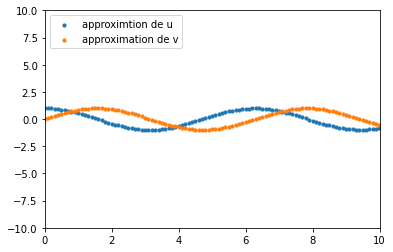

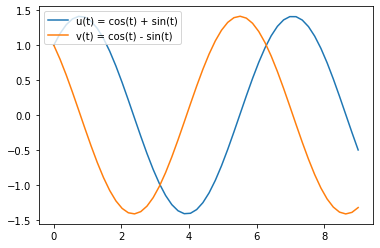

In [5]:
u0 = 1
v0 = 0

du = -v
dv = u
use_trapezoidal = True

res = Solver_two_equations(u0, v0, du, dv, use_trapezoidal)

time = []
coords_u = []
coords_v = []

for i in range(0, len(res[0])):
    time.append(res[0][i][0])
    coords_u.append(res[0][i][1])
    coords_v.append(res[1][i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(time, coords_u, s=10, label='approximtion de u')
ax1.scatter(time, coords_v, s=10, label='approximation de v')
plt.xlim([0, 10])
plt.ylim([-10, 10])
plt.legend(loc='upper left');
plt.show()

graph = plt.subplot()
x = np.linspace(0, 9)
y = np.cos(x) + np.sin(x)
z = np.cos(x) - np.sin(x)
graph.plot(x, y, label ='u(t) = cos(t) + sin(t)')
graph.plot(x, z, label ='v(t) = cos(t) - sin(t)')
plt.legend(loc='upper left')  
plt.show()

## Solver for 4 differentials equations

In [6]:
def Solver_4_equations(u0, v0, f1, f2, use_trapezoidal):
    t0 = 0
    
    uk = u0
    vk = v0
    xk_1 = np.array([u0, v0])
    xk = xk_1
    xk_save = xk
   
    velocity_n = [0, 0]
    #Need to keep in memory the previous derivative value.
    if(use_trapezoidal):
        velocity_n = [f1.subs(v, v0), f2.subs(u, u0)]
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Functions = [u0, u1, u2, ...., un]
    fu = [u0]
    fv = [v0]
    time = [t0]
    
    #Suit of x and y variables
    y0 = u0*v0
    x0 = u0 + v0 - y0
    x = [x0]
    y = [y0]
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        f_xk = 1
        
        #Newton's method
        while(nb < Nnewton):
            nb+=1
            
            vec_f = create_2_f(xk_1, f1, f2, use_trapezoidal, velocity_n)
            F_xk = create_fxk_1(xk, vec_f)
            F_xk_prime = f_prime_2_eqs(xk, vec_f[0], vec_f[1])
        
            #Formula : xk = xk_1 - tr(F'(xk_1)) * F(xk_1)
            xk_plus1 = xk - np.dot(LA.inv(F_xk_prime), F_xk)
            
            #With the uk+1 and vk+1 calculated, we can calcul the x and y value.
            next_y = xk_plus1[0]*xk_plus1[1]
            next_x = xk_plus1[0] + xk_plus1[1] - next_y
            
            #Calcul of f(uk, vk, xk, yk) for the approximation
            f_xk_plus1 = [0, 0, 0, 0]
            f_xk_plus1[0] = float(vec_f[0].evalf(subs={u: xk_plus1[0], v: xk_plus1[1]}))
            f_xk_plus1[1] = float(vec_f[1].evalf(subs={u: xk_plus1[0], v: xk_plus1[1]}))
            f_xk_plus1[2] = float(next_x)
            f_xk_plus1[3] = float(next_y)
            
            #2 types of check the approximation.
            norm_f = LA.norm(f_xk_plus1)
            norm_xk_plus1 = LA.norm(xk_plus1 - xn)
            
            xk = xk_plus1
            
            if(norm_xk_plus1 < Epsilon or norm_f < Epsilon):
                break
            
        if(use_trapezoidal):
            velocity_n[0] =  (2/delta) * (xk_plus1[0] - xk_save[0]) - velocity_n[0]
            velocity_n[1] = (2/delta) * (xk_plus1[1] - xk_save[1]) - velocity_n[1]
        
        
        #Update our 2 functions + time
        time.append(t0)
        fu.append(xk_plus1[0])
        fv.append(xk_plus1[1])
        
        #Update x and y variables
        x.append(next_x)
        y.append(next_y)
            
        #Update indexes
        xk_1 = xk
        xk_save =xk
               
    return result_solver(time, fu, fv, x, y)

## Tests system with 4 equations
$S=\begin{equation}
\left\{ 
  \begin{aligned}
    \frac{du}{dt}&=&-u+v\\
    \frac{dv}{dt}&=&v-u\\
    x&=&u+v-y\\
    y&=&uv\\
  \end{aligned}
  \right.
\end{equation}
$

$S=\begin{equation}
\left\{ 
  \begin{aligned}
    u(t)&=&2-t\\
    v(t)&=&1-t\\
    x(t)&=&-t^2+t+1\\
    y(t)&=&t^2-3t+2\\
  \end{aligned}
  \right.
\end{equation}
$


In [7]:
u0 = 2
v0 = 1

du = -u + v
dv = v - u
y = u * v
x = u + v - y

use_trapezoidal = True

res = Solver_4_equations(u0, v0, du, dv, use_trapezoidal)

time = []
coords_u = []
coords_v = []
coords_x = []
coords_y = []

for i in range(0, len(res[0])):
    time.append(res[0][i][0])
    coords_u.append(res[0][i][1])
    coords_v.append(res[1][i][1])
    coords_x.append(res[2][i][1])
    coords_y.append(res[3][i][1])


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(time, coords_u, s=5, label='approximtion de u')
ax1.scatter(time, coords_v, s=5, label='approximation de v')
ax1.scatter(time, coords_x, s=5, label='approximation de x')
ax1.scatter(time, coords_y, s=5, label='approximation de y')
plt.xlim([0, 4])
plt.ylim([-10, 5])
ax1.grid(True)
plt.legend(loc='lower right');
plt.show()

graph = plt.subplot()
t = np.linspace(0, 4)
u = 2 - t
v = 1 - t
x_ = -t**2 + t + 1
y_ = t**2 - 3*t + 2
graph.plot(t, u, label ='u(t) = 2 - t')
graph.plot(t, v, label ='v(t) = 1 - t')
graph.plot(t, x_, label ='x(t) = -t^2 + t + 1')
graph.plot(t, y_, label ='y(t) = t^2 - 3t + 2')
graph.grid(True)
plt.legend(loc='lower right')  
plt.show()

NameError: name 'xn' is not defined